In [2]:
# importing major libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

import os, sys
from scipy import stats
import numpy as np

In [3]:
# importing the dataset

data=pd.read_csv("C:\\Users\\Ritesh\\Downloads\\Titanic-Dataset (1).csv")

In [4]:
data.head() # we have to predict whether the person survived or not
# 0 indicates - not survived
# 1 indicates - survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning



In [5]:
# Dropping the column "passenger ID" since this column is not useful for prediction
data.drop("PassengerId",axis=1,inplace=True)

In [6]:
data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

# Dealing with null values

In [7]:
#checking for null values
data.isnull().sum() # here null values in age, cabin,embarked. 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# checking Dtypes
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.Age # Since the Age contains values in float so we can fill null values with its mean

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
# fill null values using mean
data.Age.fillna(data.Age.mean(),inplace=True)

In [11]:
# dealing with 'cabin'column.
data.Cabin.value_counts().count() # Since the 'Cabin' column is object we can fill null values only with the mode. but the count of null values is very high. so its better to drop that column in order to maintain accuracy

147

In [12]:
# drop with 'cabin' columns:
data.drop('Cabin',axis=1,inplace=True)

In [13]:
# dealing with the column name'Emarked'
data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_19900\859921750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)


In [14]:
# checking the null values
data.isnull().sum() # null values is sucessfully fill

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Exploring the dataset

In [15]:
# checking the balancing of the dataset
data.Survived.value_counts() # Data is imbalanced, which results in biased results, so, we have to use under-sampeling technique to balance the Dataset.

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
data[data.Age<10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
24,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,S
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C
...,...,...,...,...,...,...,...,...,...,...
827,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S
852,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,C


# EDA (Exploratory Data Analysis)

([<matplotlib.patches.Wedge at 0x1d2d585bb50>,
 [Text(-0.3924814551703353, -1.134001017348475, 'Not Survived'),
  Text(0.3597745699143713, 1.039500966253966, 'Survived')],
 [Text(-0.22894751551602888, -0.661500593453277, '61.6%'),
  Text(0.19624067449874796, 0.5670005270476178, '38.4%')])

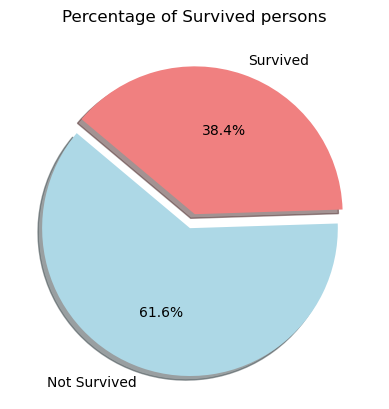

In [17]:
# Percentage of survived persons(pie)
plt.title('Percentage of Survived persons')  
plt.pie(data.Survived.value_counts(),labels=['Not Survived','Survived'],autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], explode=(0.1, 0), shadow=True)

Text(0, 0.5, 'Count')

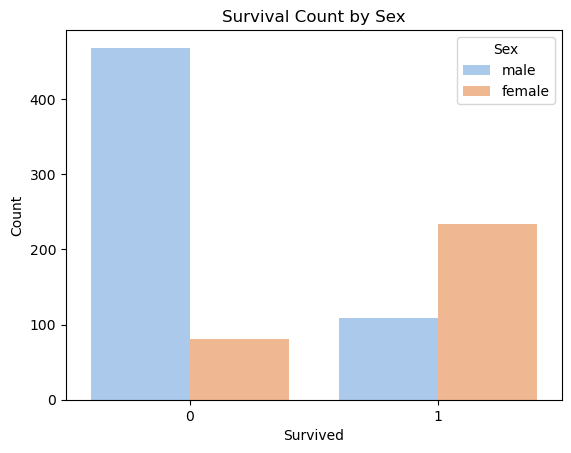

In [18]:
# Survival Count by Sex
sns.countplot(x='Survived', hue='Sex', data=data, palette='pastel')
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')


Sex
male      577
female    314
Name: count, dtype: int64

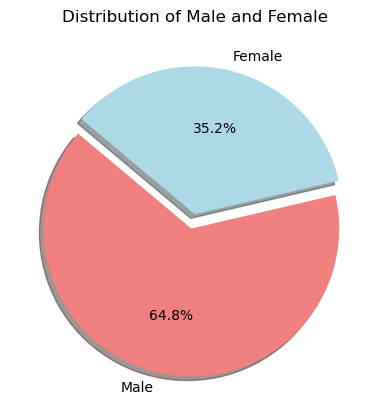

In [19]:
# Distribution of Male and Female

#plt.figure(figsize=(8, 8))
plt.pie(data.Sex.value_counts(), labels=['Male','Female'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'], explode=(0.1, 0), shadow=True)
plt.title('Distribution of Male and Female')
data.Sex.value_counts()

C:\Users\Ritesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ritesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ritesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ritesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

<Axes: xlabel='Age', ylabel='Count'>

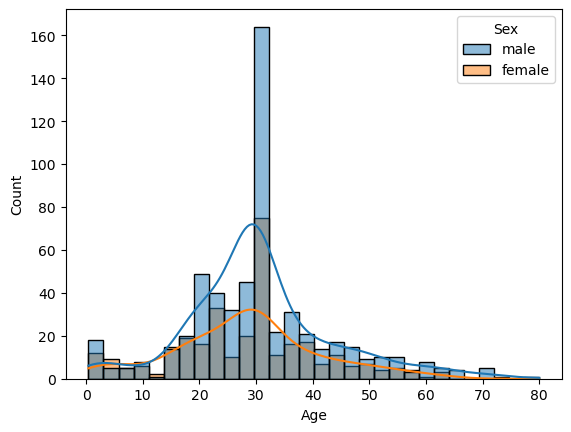

In [20]:
# Distribution of Age
import seaborn as sns

sns.histplot(data=data, x='Age', hue='Sex', kde=True)

<Axes: xlabel='Embarked', ylabel='count'>

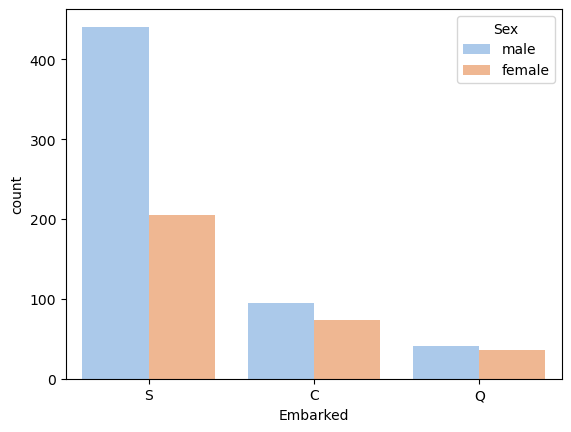

In [21]:
# Distribution of Embarked
sns.countplot(x=data.Embarked,hue=data.Sex,palette='pastel')



# prediction

In [22]:
# using Label Encoder to "Embarked"
le=LabelEncoder()
data.Embarked=le.fit_transform(data.Embarked)
data.Sex=le.fit_transform(data.Sex)

In [23]:
# creating dependent and independent variables
x=data.drop(['Survived','Name'],axis=1)
y=data.Survived
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [24]:
# using undersampling technique to get unbiased result by equalising the classification of 'survived'column
us=RandomUnderSampler()
x_resample,y_resample=us.fit_resample(x,y)
print(y_resample)

234    0
99     0
20     0
488    0
450    0
      ..
875    1
879    1
880    1
887    1
889    1
Name: Survived, Length: 684, dtype: int64


In [25]:
x_resample.reset_index(drop=True)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,24.0,0,0,C.A. 29566,10.5000,2
1,2,1,34.0,1,0,244367,26.0000,2
2,2,1,35.0,0,0,239865,26.0000,2
3,3,1,30.0,0,0,A.5. 18509,8.0500,2
4,2,1,36.0,1,2,C.A. 34651,27.7500,2
...,...,...,...,...,...,...,...,...
679,3,0,15.0,0,0,2667,7.2250,0
680,1,0,56.0,0,1,11767,83.1583,0
681,2,0,25.0,0,1,230433,26.0000,2
682,1,0,19.0,0,0,112053,30.0000,2


In [26]:
y_resample.value_counts().reset_index(drop=True)

0    342
1    342
Name: count, dtype: int64

In [49]:
# splitting Training and testing Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)
x_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
425,3,1,29.699118,0,0,A/4. 34244,7.2500,2
106,3,0,21.000000,0,0,343120,7.6500,2
822,1,1,38.000000,0,0,19972,0.0000,2
331,1,1,45.500000,0,0,113043,28.5000,2
107,3,1,29.699118,0,0,312991,7.7750,2
...,...,...,...,...,...,...,...,...
442,3,1,25.000000,1,0,347076,7.7750,2
372,3,1,19.000000,0,0,323951,8.0500,2
552,3,1,29.699118,0,0,330979,7.8292,1
837,3,1,29.699118,0,0,392092,8.0500,2


In [28]:
# assigning the varaible to Algorithm(Random forest classifier)
rfc = RandomForestClassifier(n_estimators=100,max_depth=5)
print(rfc)

RandomForestClassifier(max_depth=5)


In [54]:
# fitting the training data into Algo
from sklearn.ensemble import RandomForestClassifier

# fitting the training data into Algo
rfc.fit(x_train,y_train)
    
document.querySelector("#sklearn-ensemble-randomforestclassifier > dl > dd > p:nth-child(1)")

ValueError: could not convert string to float: 'A/4. 34244'

In [55]:
# Model prediction

y_pred=rfc.predict(x_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'